In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

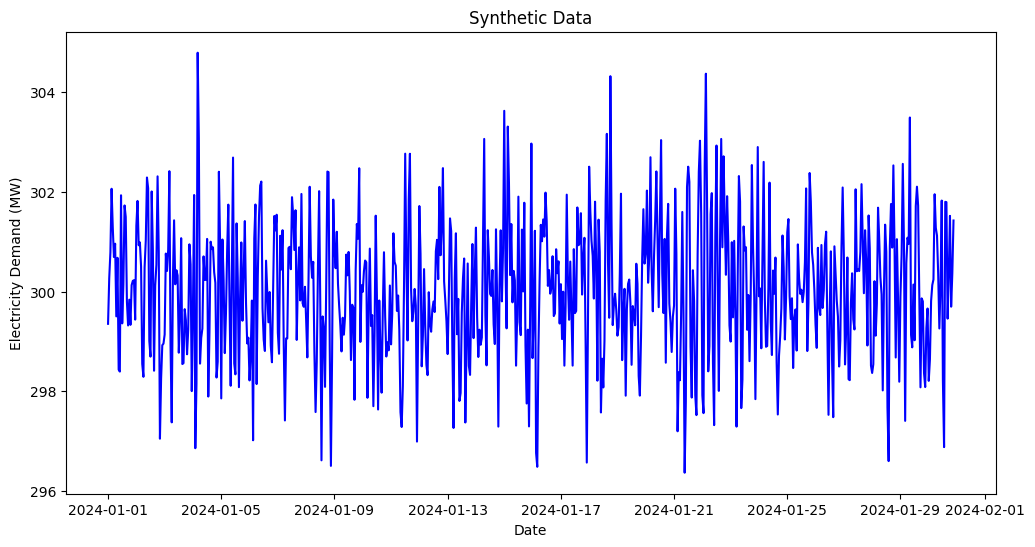

In [3]:
# Generate some electricity demand data from an MA(2) process (influenced by weather-related shocks)
np.random.seed(154)
n_hours = 24 * 30  # 30 days of hourly data
mu = 300  # Baseline average demand in MW
theta = [0.8, -0.4]  # MA(2) coefficients representing the influence of recent shocks (e.g., sudden temp change)
sigma = 1  # Standard deviation of the noise (represents volatility in demand)
noise = np.random.normal(0, sigma, size=n_hours)
demand_series = np.zeros(n_hours)

# Generate the MA(2) process
for t in range(2, n_hours):
    demand_series[t] = (mu + 
                        noise[t] + 
                        theta[0] * noise[t-1] + 
                        theta[1] * noise[t-2])

# Slice the NumPy array to drop the first two entries
demand_series = demand_series[2:]

# Create a time index
time_index = pd.date_range(start='2024-01-01', periods=n_hours - 2, freq='h')
demand_series = pd.Series(demand_series, index=time_index)

# Plot the generated demand series (for visual inspection)
plt.figure(figsize=(12, 6))
plt.plot(demand_series, color='blue')
plt.title('Synthetic Data')
plt.xlabel('Date')
plt.ylabel('Electricity Demand (MW)')
plt.show()


In [4]:
# Check for stationarity
adf_result = adfuller(demand_series)
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

ADF Statistic: -6.759555748458377
p-value: 2.8148758471293772e-09


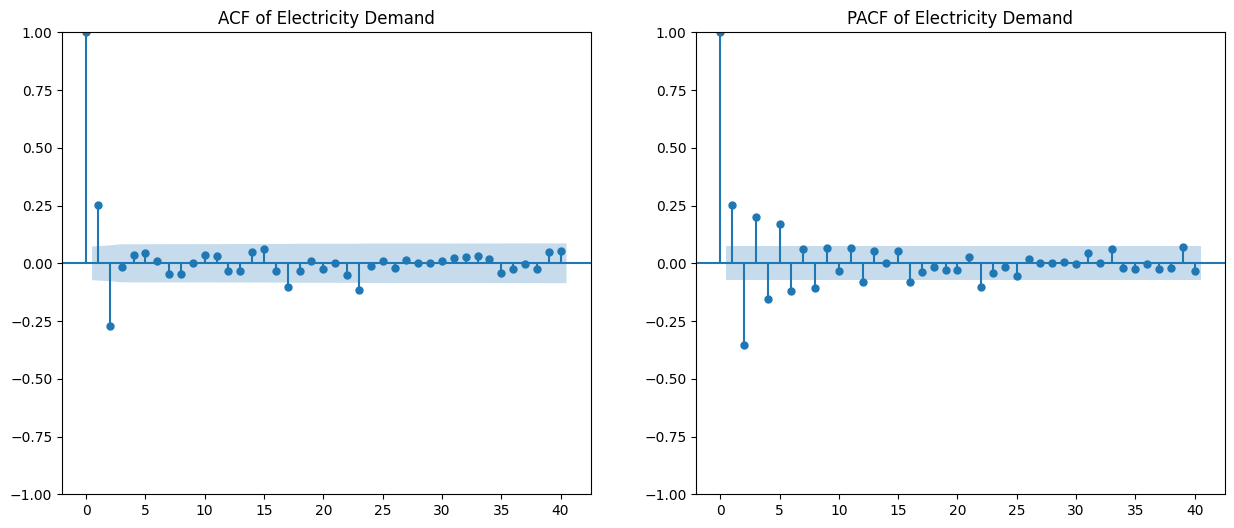

In [5]:
# Plot ACF and PACF
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
sm.graphics.tsa.plot_acf(demand_series, lags=40, ax=axs[0])
axs[0].set_title('ACF of Electricity Demand')
sm.graphics.tsa.plot_pacf(demand_series, lags=40, ax=axs[1])
axs[1].set_title('PACF of Electricity Demand')

plt.show()

In [6]:
# Split the data into training and test sets 
train_size = int(len(demand_series) * 0.99)
train, test = demand_series[:train_size], demand_series[train_size:]


In [7]:
# Fit an MA(2) model to the training data
model_ma2 = ARIMA(train, order=(0, 0, 2))
model_fit_ma2 = model_ma2.fit()
forecast_ma2 = model_fit_ma2.predict(start=len(train), end=len(train) + len(test) - 1)

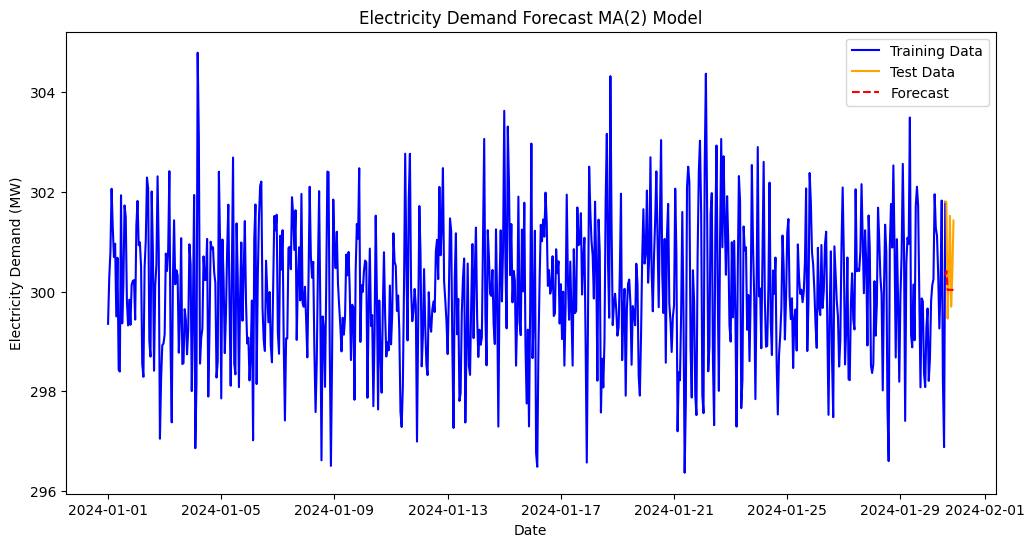

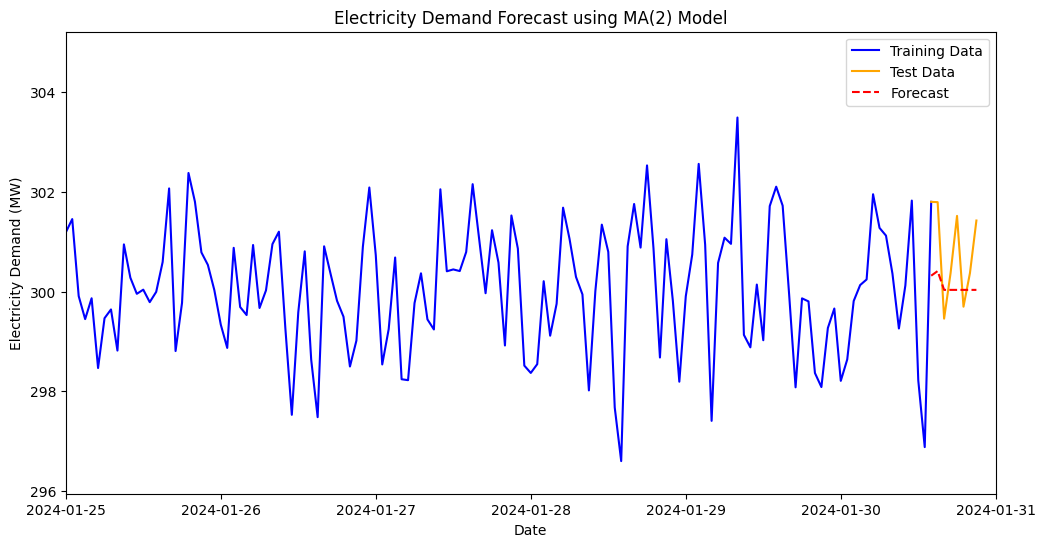

In [8]:
# For visual purposes, extend the training data with the first value of the test set
first_test_value = pd.Series([test.iloc[0]], index=[test.index[0]])
extended_train = pd.concat([train, first_test_value])

# Plot
plt.figure(figsize=(12, 6))
plt.plot(extended_train.index, extended_train, label='Training Data', color='blue')
plt.plot(test.index, test, label='Test Data', color='orange')
plt.plot(forecast_ma2.index, forecast_ma2, label='Forecast', color='red', linestyle='--')  
plt.title('Electricity Demand Forecast MA(2) Model')  
plt.xlabel('Date')
plt.ylabel('Electricity Demand (MW)')
plt.legend()
plt.show()


# Plot
plt.figure(figsize=(12, 6))
plt.plot(extended_train.index, extended_train, label='Training Data', color='blue')
plt.plot(test.index, test, label='Test Data', color='orange')
plt.plot(forecast_ma2.index, forecast_ma2, label='Forecast', color='red', linestyle='--') 
plt.xlim([pd.Timestamp('2024-01-25'), pd.Timestamp('2024-01-31')])  
plt.title('Electricity Demand Forecast using MA(2) Model') 
plt.xlabel('Date')
plt.ylabel('Electricity Demand (MW)')
plt.legend()
plt.show()